# Loading DB

In [35]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [36]:
digits = load_digits()

In [37]:
X, y = digits.data, digits.target

In [38]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [39]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [40]:
X.shape

(1797, 64)

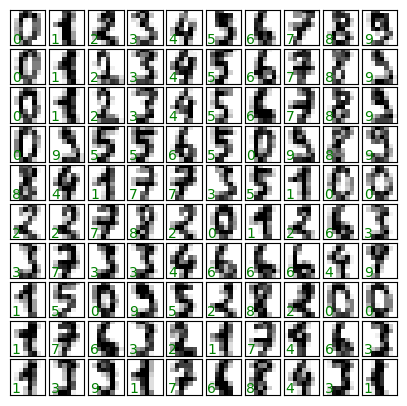

In [41]:
fig, axes = plt.subplots(10, 10, figsize=(5, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')


In [42]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.7, random_state=41)

# Import data

In [43]:
import json
file_path = 'data.json'

with open(file_path, 'r') as f:
    data = json.load(f)

X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

X_train = np.array(data['X_train'])
y_train = np.array(data['y_train'])
X_test = np.array(data['X_test'])
y_test = np.array(data['y_test'])


print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1257, 64)
Shape of y_train: (1257,)
Shape of X_test: (540, 64)
Shape of y_test: (540,)


# Feature Selection

In [44]:
from sklearn.feature_selection import VarianceThreshold

## P = 0.8

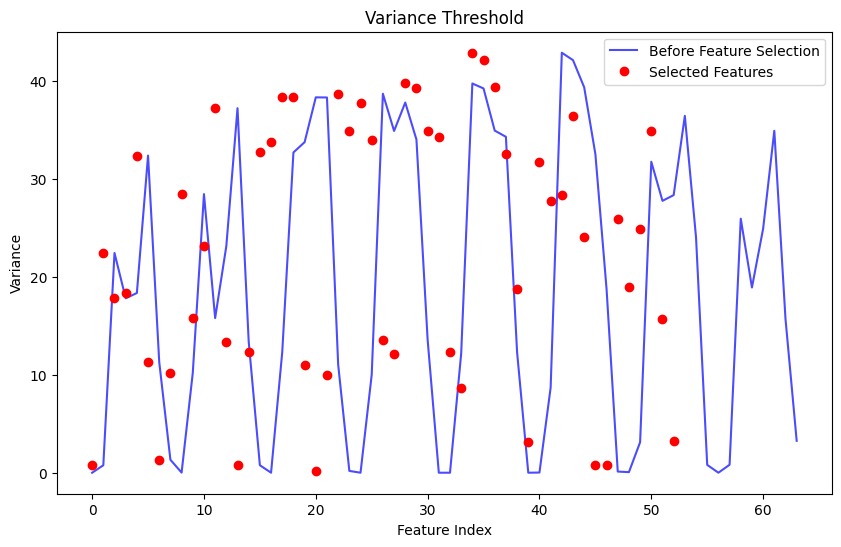

Number of selected features (VarianceThreshold): 53


In [45]:
# Calculate variances of features before feature selection
variances_before = np.var(X_train, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_fs_p80 = sel.fit_transform(X)
# Calculate variances of features after feature selection
variances_after = np.var(X_fs_p80, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs_p80.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

--------------------------------------------------------------------------------------------------------------------------------------------
The graph you provided is a visualization of the variance of features before and after applying feature selection using VarianceThreshold.

The x-axis represents the feature index, and the y-axis represents the variance. The blue line shows the variance of each feature before feature selection. The red circles show the variance of the features that were selected after applying the VarianceThreshold filter.

The code you provided calculates the variance of each feature before applying the filter (variances_before) and after applying the filter (variances_after). It then plots these variances on the same graph. The threshold used for the VarianceThreshold filter is not shown in the graph, but it determines which features are considered to have low variance and are removed.

----------------------------------------------------------------------------------------------------------------------------------------------

# Feature Extraction 

Number of PCA Components: 2
Accuracy: 0.5314814814814814
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66        52
           1       0.38      0.48      0.43        54
           2       0.51      0.75      0.61        55
           3       0.34      0.41      0.37        49
           4       0.84      0.96      0.90        55
           5       0.20      0.16      0.18        56
           6       0.79      0.78      0.78        58
           7       0.64      0.81      0.72        48
           8       0.25      0.19      0.21        48
           9       0.55      0.17      0.26        65

    accuracy                           0.53       540
   macro avg       0.52      0.54      0.51       540
weighted avg       0.52      0.53      0.51       540



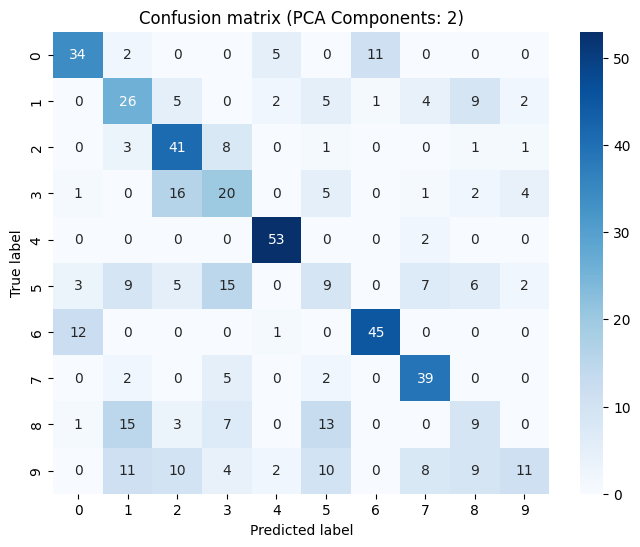

Number of PCA Components: 5
Accuracy: 0.7944444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.72      0.78      0.75        54
           2       0.74      0.82      0.78        55
           3       0.72      0.67      0.69        49
           4       0.87      0.96      0.91        55
           5       0.85      0.84      0.85        56
           6       0.95      0.93      0.94        58
           7       0.79      0.79      0.79        48
           8       0.59      0.54      0.57        48
           9       0.72      0.66      0.69        65

    accuracy                           0.79       540
   macro avg       0.79      0.79      0.79       540
weighted avg       0.79      0.79      0.79       540



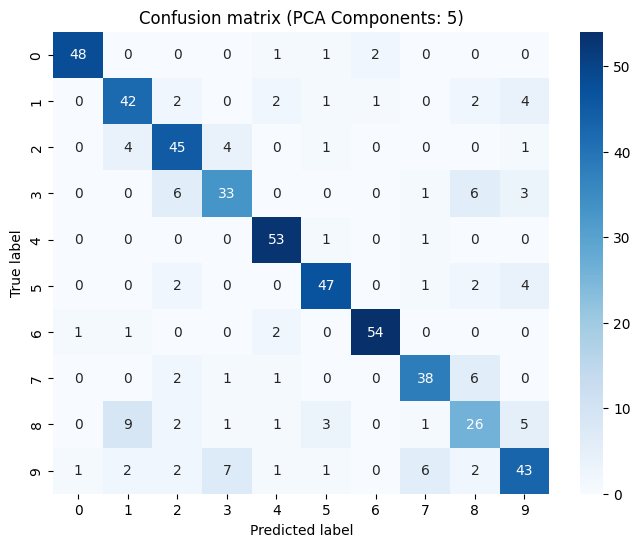

Number of PCA Components: 10
Accuracy: 0.8851851851851852
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.79      0.91      0.84        54
           2       0.96      0.93      0.94        55
           3       0.78      0.73      0.76        49
           4       0.93      0.96      0.95        55
           5       0.93      0.93      0.93        56
           6       0.97      0.97      0.97        58
           7       0.98      0.96      0.97        48
           8       0.69      0.73      0.71        48
           9       0.85      0.77      0.81        65

    accuracy                           0.89       540
   macro avg       0.89      0.88      0.88       540
weighted avg       0.89      0.89      0.89       540



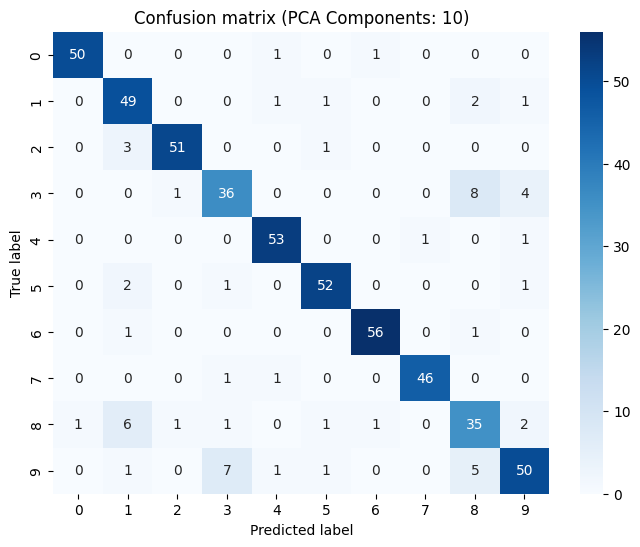

Number of PCA Components: 15
Accuracy: 0.9388888888888889
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.89      0.93      0.91        54
           2       0.93      1.00      0.96        55
           3       0.95      0.82      0.88        49
           4       0.95      0.98      0.96        55
           5       0.92      0.96      0.94        56
           6       0.98      0.97      0.97        58
           7       0.98      1.00      0.99        48
           8       0.86      0.90      0.88        48
           9       0.95      0.88      0.91        65

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540



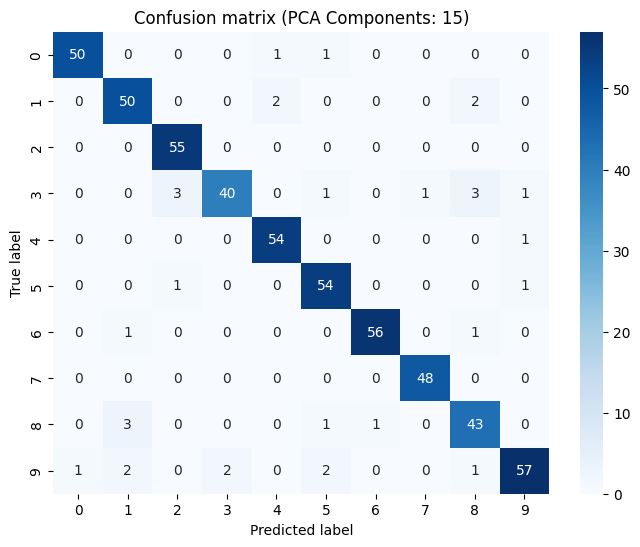

Number of PCA Components: 20
Accuracy: 0.9425925925925925
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.88      0.91      0.89        54
           2       0.96      0.95      0.95        55
           3       0.94      0.90      0.92        49
           4       0.96      0.98      0.97        55
           5       0.93      0.96      0.95        56
           6       1.00      0.97      0.98        58
           7       0.98      1.00      0.99        48
           8       0.84      0.90      0.87        48
           9       0.94      0.89      0.91        65

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540



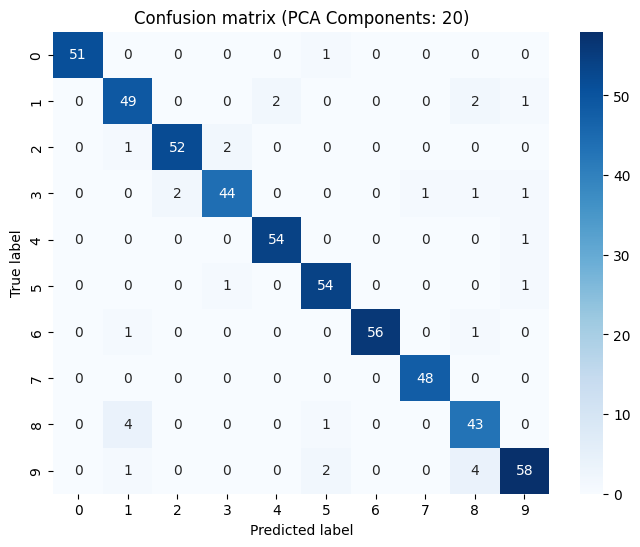

Number of PCA Components: 30
Accuracy: 0.9537037037037037
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.91      0.94      0.93        54
           2       0.95      1.00      0.97        55
           3       0.98      0.88      0.92        49
           4       0.98      0.98      0.98        55
           5       0.95      0.98      0.96        56
           6       1.00      0.98      0.99        58
           7       0.98      1.00      0.99        48
           8       0.83      0.90      0.86        48
           9       0.98      0.88      0.93        65

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.96      0.95      0.95       540



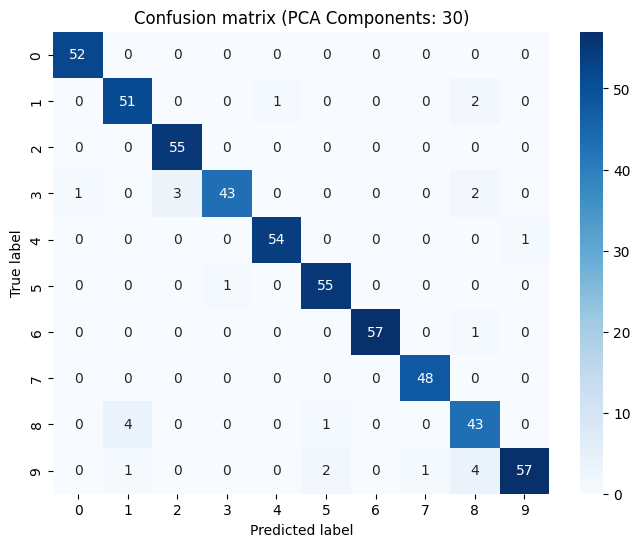

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, components, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(f'{title} (PCA Components: {components})')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=41)

# Apply VarianceThreshold feature selection to training and testing sets
X_train_fs_p80 = sel.transform(X_train)
X_test_fs_p80 = sel.transform(X_test)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fs_p80)
X_test_scaled = scaler.transform(X_test_fs_p80)

# Define the number of components for PCA
n_components_list = [2, 5, 10, 15, 20, 30]

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increased max_iter

for n_components in n_components_list:
    # Apply PCA to training and testing sets
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train logistic regression model
    logistic_model.fit(X_train_pca, y_train)

    # Predict on test data
    y_pred = logistic_model.predict(X_test_pca)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Number of PCA Components: {n_components}")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, digits.target_names, n_components)
    